# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 campaigns 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# I'll be doing all of my importing here. 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score





In [2]:
bank_data = pd.read_csv('data/bank-additional-full.csv', sep = ';') #bringing in the data

In [3]:
bank_data.head()#getting a feel for it
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
missing_values = bank_data.isnull().sum()#looking for the size of the nan problem
unknown_values_count = (bank_data == 'unknown').sum()
print("Count of 'unknown' values in each column:\n", unknown_values_count)
print("Missing values count:\n", missing_values)



Count of 'unknown' values in each column:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
Missing values count:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
# there's no missing data but there are unkowns
# I will drop unkowns because it will make little impact to size of data
# I will probably be better served if everything was a numerical value. 

columns_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in columns_to_check:
    bank_data = bank_data[bank_data[col] != 'unknown']



In [6]:
# checking work

missing_values = bank_data.isnull().sum()
unknown_values_count = (bank_data == 'unknown').sum()
print("Count of 'unknown' values in each column:\n", unknown_values_count)
print("Missing values count:\n", missing_values)

Count of 'unknown' values in each column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Missing values count:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

# Objective

The primary business objective of this effort is to develop a predictive classifier model that can accurately identify potential customers who are most likely to be converted to a customer from a marketing call. This will improve conversion rates, optimize resource allocation and improve customer interaction by engaging less with less interested customers. 

Given the context, that a sales and marketing team will be the group primarily using this model, it should be explainable to people without a data background. This context creates a preference for a decision tree model so if all models are equal, it will be the winning model.

Fundamentally this should result in a competitive advantage and increased profits. 


In [7]:
bank_data.info() #checking the impact of the above.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

I'm going to use histograms to get a quick understanding of much of the data and look for outlyers.

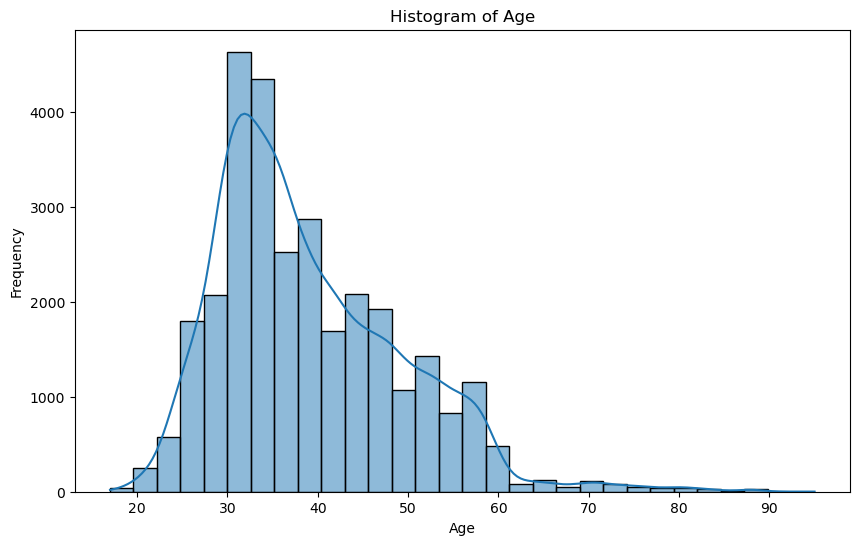

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(bank_data['age'], bins=30, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


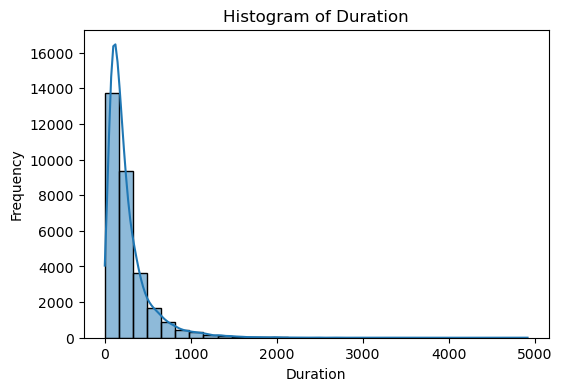

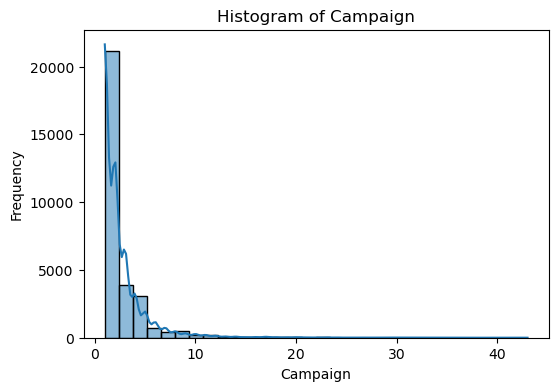

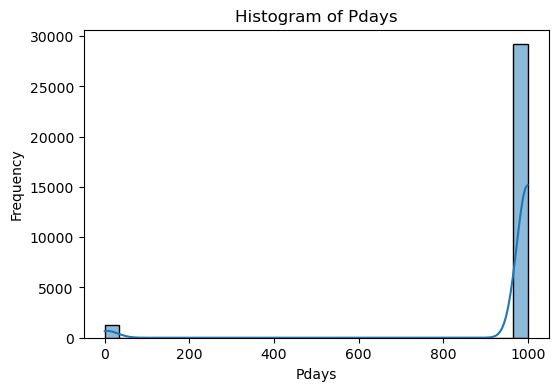

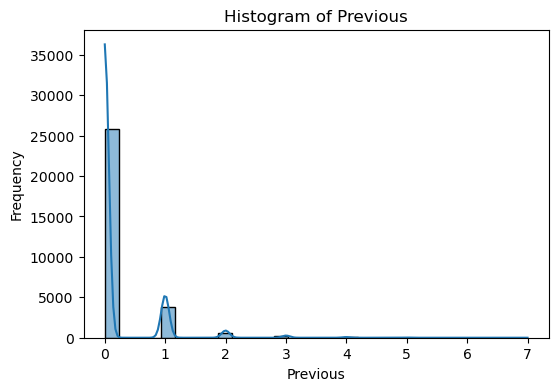

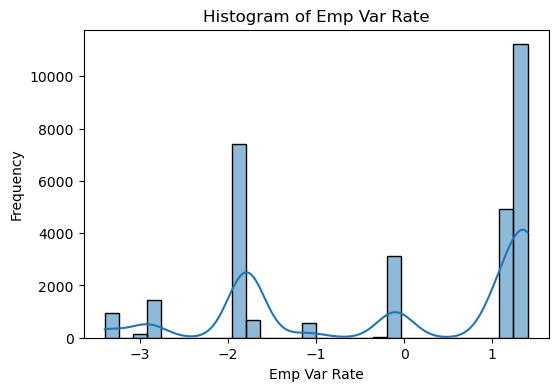

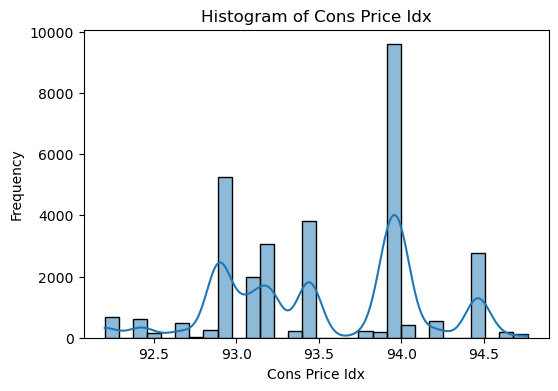

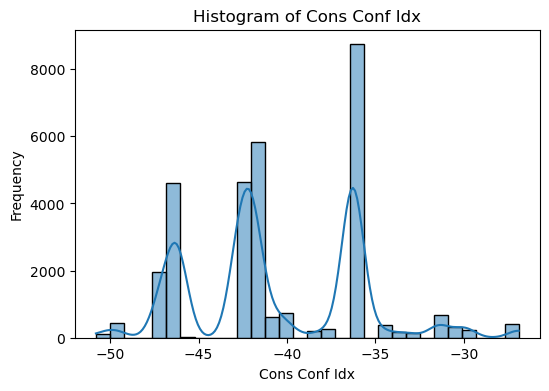

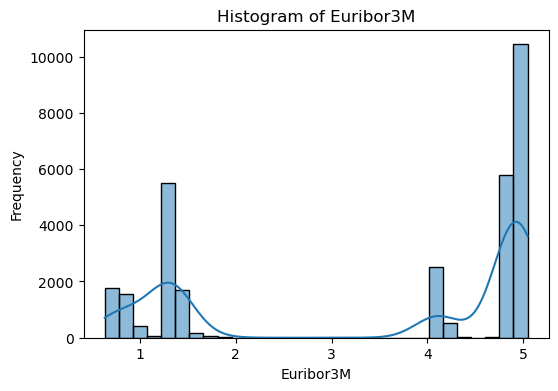

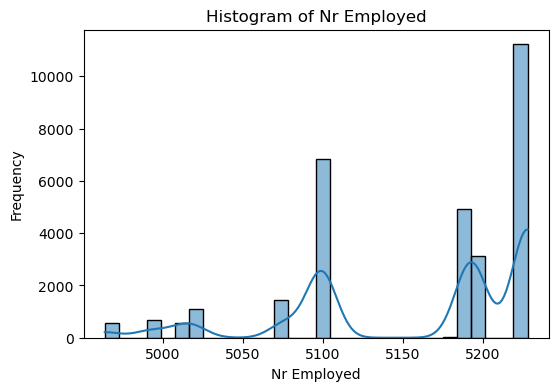

In [9]:
numeric_features = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(bank_data[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature.title().replace(".", " ")}')
    plt.xlabel(feature.title().replace(".", " "))
    plt.ylabel('Frequency')
    plt.show()


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

I'm going to use visuals to get an undstanding of these columns before encoding them. 

I am dummy encoding 'job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'and used binary encoding on 'default', 'housing', 'loan as well as the target y.



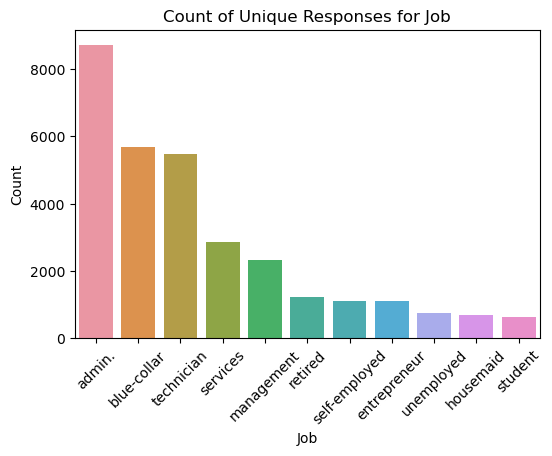

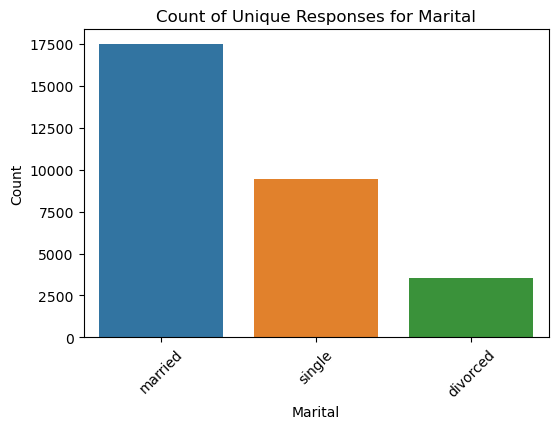

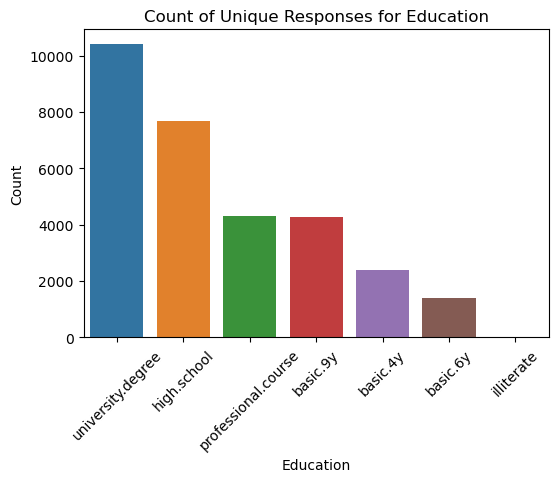

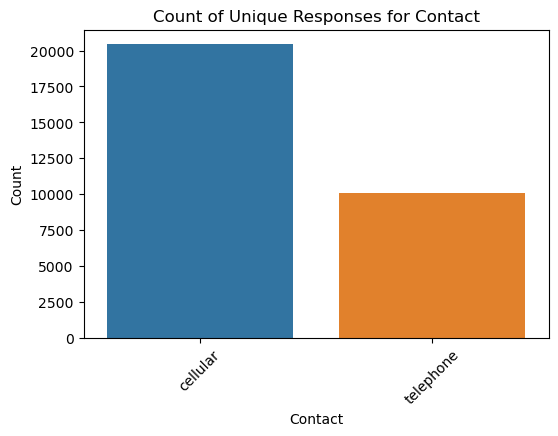

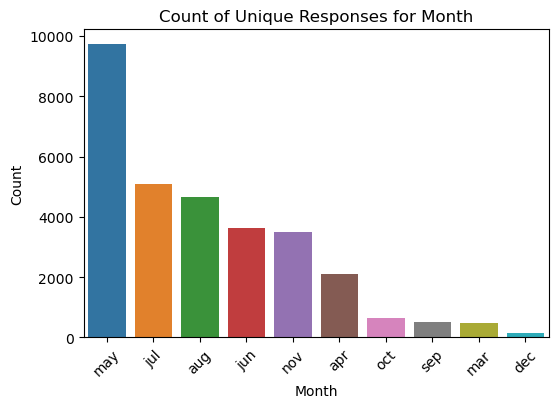

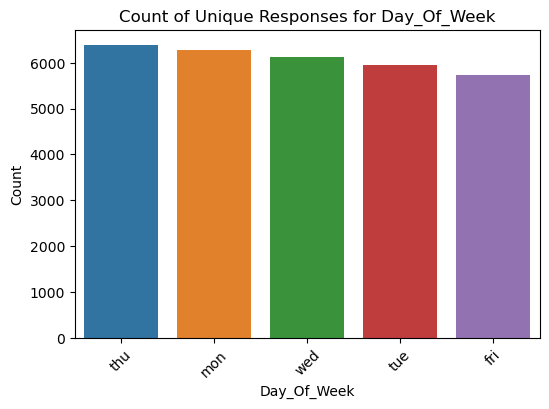

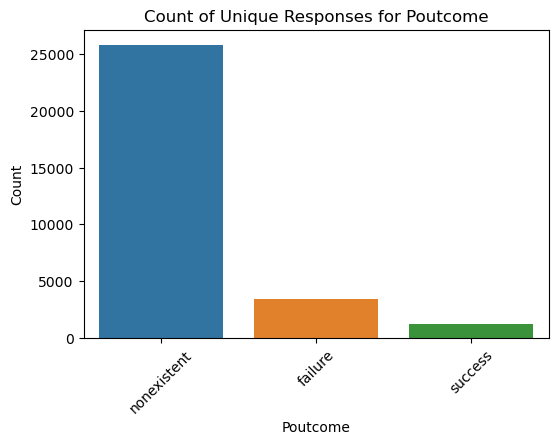

In [10]:
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=bank_data[feature], order=bank_data[feature].value_counts().index)
    plt.title(f'Count of Unique Responses for {feature.title()}')
    plt.xticks(rotation=45)
    plt.xlabel(feature.title())
    plt.ylabel('Count')
    plt.show()


In [11]:
#I need to ecode dummies

# One-hot encoding for non-ordinal categorical variables
columns_to_encode = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
bank_data = pd.get_dummies(bank_data, columns=columns_to_encode)

# changing categories to 1 and 0
label_encoder = LabelEncoder()

binary_cols = ['default', 'housing', 'loan']

for col in binary_cols:
    bank_data[col] = label_encoder.fit_transform(bank_data[col].replace({'yes': 1, 'no': 0}))

# encoding target
bank_data['y'] = label_encoder.fit_transform(bank_data['y'])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [12]:
#I'm going to scale it at the same time

X = bank_data.drop('y', axis=1)
y = bank_data['y']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Using logistic regression as the baseline model to compare other models against

In [13]:
#I was told I could do this for the baseline. Instructions were unclear.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [14]:
#my baseline was a logistic regression model. 


### Problem 9: Score the Model

What is the accuracy of your model?

In [15]:
accuracy = logreg.score(X_train, y_train)
print("Training accuracy:", accuracy)

accuracy = logreg.score(X_test, y_test)
print("Test accuracy:", accuracy)

Training accuracy: 0.9003326929384753
Test accuracy: 0.9002951787471302


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

I am interjecting two of my own opinions at this point based on my experiance working in finance with sales people early in my career. 1) percision will be important as everyone hates, both company and user, hates it when the wrong person is called. 2) Decision tree will win out when all else is equal because sales and marketing people have a much better understanding of them which makes them using the model much more likely. 

In [16]:
# Initializing the 4 models. This general block of code will be repeated many times in this notebook
models = {
    "Baseline Logistic Reg": LogisticRegression(),
    "Baseline KNN": KNeighborsClassifier(),
    "Baseline Decision Tree": DecisionTreeClassifier(),
    "Baseline SVM": SVC()
}


results = []

# Training and judging each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating accuracy and precision
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)

    results.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision
    })

#Displaying results
results_df = pd.DataFrame(results)
display(results_df)



,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision
0,Baseline Logistic Reg,0.126104,0.900333,0.900295,0.660356,0.674699
1,Baseline KNN,0.002063,0.912610,0.882038,0.752927,0.570571
2,Baseline Decision Tree,0.189848,1.000000,0.876353,1.000000,0.517413
3,Baseline SVM,6.563342,0.920857,0.897562,0.800120,0.670520


In [17]:
# Creating a df to display results
results_df = pd.DataFrame(results)
display(results_df)

,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision
0,Baseline Logistic Reg,0.126104,0.900333,0.900295,0.660356,0.674699
1,Baseline KNN,0.002063,0.912610,0.882038,0.752927,0.570571
2,Baseline Decision Tree,0.189848,1.000000,0.876353,1.000000,0.517413
3,Baseline SVM,6.563342,0.920857,0.897562,0.800120,0.670520


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

I'm going to start with feature exploration starting with:
1) Examinging coorelations and looking for multicollinearity
2) Examining the business context of the features and deciding whether to keep them

Then I'm going to tune hyperparameters for each model while using cross validation

Then I will compare the models across multiple perforamnce metrics including accuracy, precision and recall. 



In [18]:
# There are too many rows to make a useful heatmap so I am printing the 20 highest absoulte coorleations 

corr_matrix = bank_data.corr()
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# removing self-correlations (where Feature1 and Feature2 are the same)
corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

# Sorting
corr_pairs_sorted = corr_pairs.copy()
corr_pairs_sorted['Correlation'] = corr_pairs_sorted['Correlation'].abs()
corr_pairs_sorted = corr_pairs_sorted.sort_values(by='Correlation', ascending=False)

# Printing the top 20 correlations
print(corr_pairs_sorted.head(20))

                  Feature1              Feature2  Correlation
2015     contact_telephone      contact_cellular     1.000000
1961      contact_cellular     contact_telephone     1.000000
451           emp.var.rate             euribor3m     0.969412
613              euribor3m          emp.var.rate     0.969412
384                  pdays      poutcome_success     0.951930
2976      poutcome_success                 pdays     0.951930
671            nr.employed             euribor3m     0.944871
617              euribor3m           nr.employed     0.944871
452           emp.var.rate           nr.employed     0.900390
668            nr.employed          emp.var.rate     0.900390
2922  poutcome_nonexistent              previous     0.875764
438               previous  poutcome_nonexistent     0.875764
2967  poutcome_nonexistent      poutcome_failure     0.843324
2913      poutcome_failure  poutcome_nonexistent     0.843324
1457       marital_married        marital_single     0.777133
1511    

In [19]:
# There are some extremely coorelated features here. I am researching variance inflaction factor (VIF) due to this.
# I am going to run examine VIF and very conservatively apply it. 


# Assuming all features are numeric. If not, one-hot encode categorical variables first
# Selecting features for checking VIF
features = bank_data.select_dtypes(include=['float64', 'int64'])

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

print(vif_data)

           Feature           VIF
0              age     15.618424
1          default      1.000407
2          housing      2.200461
3             loan      1.188695
4         duration      2.001142
5         campaign      1.926068
6            pdays     38.149055
7         previous      2.009842
8     emp.var.rate     27.405754
9   cons.price.idx  21034.715508
10   cons.conf.idx    110.275803
11       euribor3m    194.927006
12     nr.employed  24956.654930


VIF over 10 should be examined but based on my limited experience here I will be overly cautious. From a business perspective many of these are in fact redundant features and looking at VIF and the correlation table I will remove nr.employed, cons.price.idx, contact telephone (due to 100% correlation with contact_cellular), and euribor3m before retesting models. 


In [20]:
reduced_features_bank_data = bank_data.drop(['nr.employed', 'cons.price.idx', 'contact_telephone', 'euribor3m'], axis=1)

reduced_features_bank_data.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,0,261,1,999,0,1.1,-36.4,...,0,0,0,1,0,0,0,0,1,0
2,37,0,1,0,226,1,999,0,1.1,-36.4,...,0,0,0,1,0,0,0,0,1,0
3,40,0,0,0,151,1,999,0,1.1,-36.4,...,0,0,0,1,0,0,0,0,1,0
4,56,0,0,1,307,1,999,0,1.1,-36.4,...,0,0,0,1,0,0,0,0,1,0
6,59,0,0,0,139,1,999,0,1.1,-36.4,...,0,0,0,1,0,0,0,0,1,0


In [21]:
reduced_features_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30488 non-null  int64  
 1   default                        30488 non-null  int64  
 2   housing                        30488 non-null  int64  
 3   loan                           30488 non-null  int64  
 4   duration                       30488 non-null  int64  
 5   campaign                       30488 non-null  int64  
 6   pdays                          30488 non-null  int64  
 7   previous                       30488 non-null  int64  
 8   emp.var.rate                   30488 non-null  float64
 9   cons.conf.idx                  30488 non-null  float64
 10  y                              30488 non-null  int32  
 11  job_admin.                     30488 non-null  uint8  
 12  job_blue-collar                30488 non-null 

In [22]:
# Spliting the data
X_reduced = reduced_features_bank_data.drop('y', axis=1)
y_reduced = reduced_features_bank_data['y']
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# Initializing models
models = {
    "Logistic Reg": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

scaled_results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train_reduced)
    train_time = time.time() - start_time

    train_accuracy = accuracy_score(y_train_reduced, model.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test_reduced, model.predict(X_test_scaled))

    scaled_results.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

scaled_results_df = pd.DataFrame(scaled_results)
display(scaled_results_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Reg,0.090295,0.898177,0.899421
1,KNN,0.007905,0.910454,0.880289
2,Decision Tree,0.123402,1.000000,0.873729
3,SVM,6.428698,0.917905,0.895485


Dropping these features had a small but inconsequetial impact on the model but did reduce the total size of the data which is a positive. I am now turning to tuning and cross validation. We're going to do this by defining parameters for each, creating pipelines and then performing gridsearchCV for each

In [23]:
# Parameter grid for Logistic Regression
param_grid_lr = {'logisticreg__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Parameter grid for KNN
param_grid_knn = {'kneighborsclassifier__n_neighbors': list(range(1, 31))}

# Parameter grid for Decision Tree
param_grid_dt = {'decisiontreeclassifier__max_depth': [None] + list(range(1, 21))}

# Parameter grid for SVM
param_grid_svm = {
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

In [24]:
# Creating pipelines for each model
pipe_lr = Pipeline([('scaler', StandardScaler()), ('logisticreg', LogisticRegression())])
pipe_knn = Pipeline([('scaler', StandardScaler()), ('kneighborsclassifier', KNeighborsClassifier())])
pipe_dt = Pipeline([('scaler', StandardScaler()), ('decisiontreeclassifier', DecisionTreeClassifier())])
pipe_svm = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [25]:
# Logistic Regression
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_reduced, y_train_reduced)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best score for Logistic Regression:", grid_lr.best_score_)

# KNN
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_reduced, y_train_reduced)
print("Best parameters for KNN:", grid_knn.best_params_)
print("Best score for KNN:", grid_knn.best_score_)

# Decision Tree
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train_reduced, y_train_reduced)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best score for Decision Tree:", grid_dt.best_score_)

# SVM
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_reduced, y_train_reduced)

# Print the best parameters and best score
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best score for SVM:", grid_svm.best_score_)

Best parameters for Logistic Regression: {'logisticreg__C': 1}
Best score for Logistic Regression: 0.8977085955438644
Best parameters for KNN: {'kneighborsclassifier__n_neighbors': 25}
Best score for KNN: 0.8883369853456283
Best parameters for Decision Tree: {'decisiontreeclassifier__max_depth': 6}
Best score for Decision Tree: 0.8977555327382539
Best parameters for SVM: {'svc__kernel': 'rbf'}
Best score for SVM: 0.8955062027129171


Minor gains were made by adjusting hyperparameters. We are not making large gains in this effort. 

From a business sense it may be important to think about false positives, judged by the precision metric. It is a waste of resources to have people calling uninterested parties and it may hurt the reputation of the company if they are annoying people. Below I will look at optimizing for precision.

In [26]:
precision_scorer = make_scorer(precision_score, pos_label=1, zero_division=0)

# Logistic Regression
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring=precision_scorer)
grid_lr.fit(X_train_reduced, y_train_reduced)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best precision score for Logistic Regression:", grid_lr.best_score_)

# KNN
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring=precision_scorer)
grid_knn.fit(X_train_reduced, y_train_reduced)
print("Best parameters for KNN:", grid_knn.best_params_)
print("Best precision score for KNN:", grid_knn.best_score_)

# Decision Tree
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, scoring=precision_scorer)
grid_dt.fit(X_train_reduced, y_train_reduced)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best precision score for Decision Tree:", grid_dt.best_score_)

# SVM
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring=precision_scorer)
grid_svm.fit(X_train_reduced, y_train_reduced)
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best precision score for SVM:", grid_svm.best_score_)


Best parameters for Logistic Regression: {'logisticreg__C': 0.001}
Best precision score for Logistic Regression: 0.7007677846968778
Best parameters for KNN: {'kneighborsclassifier__n_neighbors': 26}
Best precision score for KNN: 0.6641187769652485
Best parameters for Decision Tree: {'decisiontreeclassifier__max_depth': 4}
Best precision score for Decision Tree: 0.642381134348
Best parameters for SVM: {'svc__kernel': 'rbf'}
Best precision score for SVM: 0.6539554293057501


Precision is lower accross the board and all but SVM had different optimal hyperparameters. This means there is a tradeoff based on which scoring target I use for 3/4 models. I will continue with scoring based on accuracy. Below is the final presentation of the models side by side. 

In [27]:
# Same methods as previously used
models = {
    "Ft Reduced Logistic Reg": LogisticRegression(C=1),
    "Ft Reduced KNN": KNeighborsClassifier(n_neighbors=25),
    "Ft Reduced Decision Tree": DecisionTreeClassifier(max_depth=6),
    "Ft Reduced SVM": SVC(kernel='rbf')
}

scaled_results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train_reduced)
    train_time = time.time() - start_time

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train_reduced, y_train_pred)
    test_accuracy = accuracy_score(y_test_reduced, y_test_pred)
    train_precision = precision_score(y_train_reduced, y_train_pred, zero_division=0)
    test_precision = precision_score(y_test_reduced, y_test_pred, zero_division=0)

    scaled_results.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision
    })

scaled_results_df = pd.DataFrame(scaled_results)
display(scaled_results_df)

,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision
0,Ft Reduced Logistic Reg,0.047924,0.898177,0.899421,0.654798,0.675939
1,Ft Reduced KNN,0.004951,0.892461,0.884662,0.684260,0.635321
2,Ft Reduced Decision Tree,0.059393,0.909751,0.896250,0.707424,0.639651
3,Ft Reduced SVM,5.923481,0.917905,0.895485,0.800129,0.662182


# Have We Improved Anything?

In [28]:
print("Baseline Model Results")
display(results_df) #displays baseline models
print("Optimized Model Results")
display(scaled_results_df) #displays new models



Baseline Model Results


,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision
0,Baseline Logistic Reg,0.126104,0.900333,0.900295,0.660356,0.674699
1,Baseline KNN,0.002063,0.912610,0.882038,0.752927,0.570571
2,Baseline Decision Tree,0.189848,1.000000,0.876353,1.000000,0.517413
3,Baseline SVM,6.563342,0.920857,0.897562,0.800120,0.670520


Optimized Model Results


,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision
0,Ft Reduced Logistic Reg,0.047924,0.898177,0.899421,0.654798,0.675939
1,Ft Reduced KNN,0.004951,0.892461,0.884662,0.684260,0.635321
2,Ft Reduced Decision Tree,0.059393,0.909751,0.896250,0.707424,0.639651
3,Ft Reduced SVM,5.923481,0.917905,0.895485,0.800129,0.662182


Optimizing the models had very little impact on accuracy for the most part but the effort was successful in improving the precision of the decision tree model. In the decision tree model where precision increased significantly. Some marginal gains were made in train time for most models but as this was done locally, should not be relied upon. 

From a business stance, this makes the decision tree very appealing as it is very easy for a sales or marketing team to understand and still has very competitive metrics with a near 90% accuracy and 63.9 precision. 

# Next Steps

Next steps would be to commit to the idea that a decision tree is the way to go and to start optimizing based on that alone. This would include revisiting data and doing cohort analysis to see if there are individual trees for different cohorts of people. Other aspects which need to be explored in optimizing the tree are min sample and leaf split, purning, and general feature imprortance analysis. 

I would then test this tree with a small group of sales people on a small batch of potential customers and compare the lift in sales vs the rest of the sales teams efforts. 
